# Executive Summary

&nbsp;&nbsp;&nbsp;&nbsp;This project investigates the factors influencing a song’s success by modeling the number of streams for Spotify’s most-streamed songs. Using a dataset of tracks, we aim to identify significant predictors and use them to predict the number of streams a song receives. Variables analyzed include the number of artists on a song, playlist inclusions, BPM, and chart positions on Spotify, Apple Music, Deezer, and Shazam. We also look at audio features such as danceability, valence, energy, acousticness, instrumentalness, liveliness, and speechiness. 
To enhance model interpretability, we present a table of PCA regression coefficients, highlighting each component’s impact on streaming numbers. The model’s explanatory power is measured using R-squared and adjusted R-squared metrics; the latter accounts for the number of variables, helping to prevent overfitting and ensuring that the model remains parsimonious. These metrics allow us to compare different models and select the one with the best balance of complexity and predictive performance. 

&nbsp;&nbsp;&nbsp;&nbsp;We evaluate predictive accuracy using root mean squared error (RMSE), measuring the average difference between predicted and actual streams. Lower RMSE values indicate better predictive capabilities, so we focus on minimizing this error to enhance model reliability. By optimizing RMSE, we ensure our model not only fits the existing data but also generalizes effectively on new, unseen songs. 

&nbsp;&nbsp;&nbsp;&nbsp;By combining statistical interpretability with predictive accuracy, our approach offers a rudimentary framework for understanding and predicting a song’s popularity in today’s music industry. Future research could enhance this model by incorporating additional variables that can better capture the auditory qualities of songs or the nuances of song publishing and promotion. 


# Introduction

&nbsp;&nbsp;&nbsp;&nbsp;The following paper describes our findings regarding the relative success of songs on the foremost streaming platform, spotify. The music industry is notoriously competitive, and our aim with this project was to learn more about the most influential characteristics of the song itself that drive popularity, measured as its total number of streams. We initially started with a dataset entitled “Spotify Most Streamed Songs” containing 25 variables, four of which were categorical, the rest numerical and over 900 of the most streamed songs on the platform. 

&nbsp;&nbsp;&nbsp;&nbsp;We began with  the initial data cleaning phase, addressing NA values, adjusting data types, creating a categorical streams variable, and hot encoding categorical variables, etcetera. Afterwards we distilled the dataset into the most relevant variables based on our intuition and known correlation concerns. These variables contained information about the song including beats per minute (BPM), danceability, the song’s key and mode, the number of artists collaborating on the song, when it was released, its place on various other charts, the number of playlists it was added to, etcetera. Finally we did some basic analysis and made necessary transformations, namely in our response variable streams which was heavily skewed and violating normality. 

&nbsp;&nbsp;&nbsp;&nbsp;With the data clean, we moved on to exploratory data analysis. First we discussed which kind of model would give the best insights in regards to our question of interest and ended up settling on regression using the discrete version of the number of streams as our response variable. Once we settled on a model, we created correlation plots and addressed multicollinearity and further refined our list of variables. Next we deployed PCA with the goal of further decorrelating our variables and refining the dimensionality of our model, resulting in 20 principal components of interest. We then ran a LASSO regression to refine the model further. The LASSO regression yielded only 3 non-zero coefficients so as a group we continued the process of iterating on the model of trying to improve its predictive accuracy and ultimate utility in answering our research question. We compared each version by splitting the data, creating a training and a test group, and evaluating each model, be it different numbers of principal components, inclusion of interaction or higher order polynomial terms, based on the R and Adjusted R squared, the Root Mean Squared Error of on both the train and test data. 

&nbsp;&nbsp;&nbsp;&nbsp;Our final model included four principal components and, based on the train and test results,  explained approximately 40% of the variance of the data and had an RMSE of roughly 0.8 (recall the response variable contained a log transformation). Ultimately these data were insufficient in creating a truly satisfactory model when it comes to predicting a song's popularity. A song’s characteristics alone are not the only factors in determining how many times a song is streamed in the modern era. Likely, factors such as the artist's level of fame, if the song was marketed through social media, or how culturally relevant the genre is at any given time play a significant role in determining how popular songs are in today's world, and these data do not capture those kinds of insights. 

# Data

&nbsp;&nbsp;&nbsp;&nbsp;For our final project, we hoped to create a model that was accurate in predicting the number of streams that a song would achieve based on song attributes, artist characteristics, and temporal factors. In turn, we decided to use a data set, called "Spotify Most Streamed Songs", that we found on Kaggle, containing 25 columns, including artist, streams, BPM, and danceability, and 953 rows. To make the data usable for regression analysis, we had to clean the data through various processes, which we complete in the Results section of our paper. 

&nbsp;&nbsp;&nbsp;&nbsp;Firstly, to deal with potential null values in the dataset, we summed the number of NAs in each column in the data, finding only 145 instances across two columns. Because this is a relatively small proportion of the dataset, we chose to remove these columns to help prepare the data for regression. Later on in our analysis, we found an error with the record at position 478. So, we found the index of the record at this position and chose to drop it because it is also such a small portion of our data. 

&nbsp;&nbsp;&nbsp;&nbsp;From there, we checked the data types of each of our columns to ensure that the columns contained the correct respective type. In doing so, we found that the columns “in_deezer_playlists", "in_shazam_charts", and "streams” were all objects instead of numbers. Therefore, we used a for loop and the function pd.to_numeric to coerce these values into the correct data type for regression.

&nbsp;&nbsp;&nbsp;&nbsp;Next, we chose to one-hot encode the variables key and mode. This converts a categorical variable into one that the computer can more easily use for analysis by assigning binary values to these variables. However, we also found another 65 NA values in the column 'in_deezer_charts' and 4 in 'in_shazam_charts'. Again, because they are such a small proportion of the data, and we did not feel that these columns were that influential, we chose to drop these NA values. We also chose to add in a new variable, danceability squared, because we thought that there may be diminishing returns to the benefit of danceability in predicting streams.

&nbsp;&nbsp;&nbsp;&nbsp;In the final part of the EDA and cleaning process, we found that the histogram of our response variable, streams, was skewed heavily to the left, violating the normality assumption. Therefore, we chose to log streams in order to fit this assumption, despite a few outliers, and better prepare the data for regression.

&nbsp;&nbsp;&nbsp;&nbsp;Overall, despite EDA and cleaning being a relatively simple process for this dataset, we still had a few challenges. The main problem was coercing the streams from a string data type to a numeric data type. This was a process that we were unfamiliar with, and despite being relatively simple, it took us a little while to figure out. We also struggled with deciding how to deal with null values. In the end, we decided just to drop them because they were a small enough portion of our dataset that they would not affect the final results. Lastly, we realized the issue with the skew in our histogram of the response late in our EDA process. In turn, we did not really know how to deal with it and had to seek assistance from Professor Johnson, as we eventually landed on logging the streams variable to fit the normality assumption.

# Methods

**Question**: Is it feasible to create a model that accurately predicts the number of streams a song will have based on artist characteristics, audio features and temporal factors?

### What is an observation:

&nbsp;&nbsp;&nbsp;&nbsp;In the original dataset, each observation contains twenty-five variables. four are categorical: track title, artist name(s), the key of the song, the mode (major or minor), and the Spotify pages’ url. The pages’ URL is irrelevant to our analysis, the track name or artist are good key values for each observation; however, in terms of regression, we believe neither is consequential. The mode and key values contain information about the song itself and have the potential to be predictors contingent on our model-building process. The rest are numerical variables and include: our response variable, the number of streams, the artist count (how many artists worked on the song), variables for how many playlists in which the song is included, and its place on the charts for four different platforms: Spotify, Apple, Deezer, and Shazam, the BPM (Beats per minute), and percentages of danceability, valence, energy, acousticness, instrumentalness, liveliness, and speechiness. Some of these variables are measured subjectively and others objectively, yet they contain information about the song’s characteristics and may still serve as useful predictors. Time-related release dates (the year and month) could serve as a categorical or numeric variable to track trends in the event it is used for our regression analysis portion. 

&nbsp;&nbsp;&nbsp;&nbsp;During the initial cleaning process, we created a streams category (which delineates between Low Medium High, and Very High). We then went through a revised cleaning process centered around preparing our variables for regression analysis. Some basic exploratory data analysis methods might omit certain variables from our consideration. Another potential step for selecting these variables could be a variable importance plot produced from the random forest method. 

### Supervised vs. unsupervised learning:

&nbsp;&nbsp;&nbsp;&nbsp;After performing EDA, we found that our data suffers from a few cases of multicollinearity. To help combat this, we plan on using unsupervised learning on the front end of our model building to make our regression more robust against these problems. Furthermore, unsupervised learning may help with discovering natural patterns and, in turn, reduce dimensionality through techniques such as PCA.

&nbsp;&nbsp;&nbsp;&nbsp;After using unsupervised learning to reduce dimensionality, we plan on using supervised learning in our regression model in an attempt to minimize error in predictions and train the model towards a specific goal (in this case predicting the number of streams). Furthermore, we chose to do regression over classification because our goal is to find the statistics that reflect trends or patterns associated with the popularity of songs, which is described by the number of streams a song has.

### Models & Algorithms:

&nbsp;&nbsp;&nbsp;&nbsp;We plan on using a couple of different methods to perform our analysis. First, we will use LASSO to assist in reducing multicollinearity problems and prevent overfitting on the training data through regularization. Additionally, this will help improve the interpretability of the model through techniques such as ridge regression. The automated variable selection will allow us to simplify our model and enhance prediction accuracy.

&nbsp;&nbsp;&nbsp;&nbsp;We are also considering using Random Forest. Random Forest can reduce overfitting of our model by averaging predictions across multiple decision trees. Averaging our decision trees will smooth out extreme predictions and should lead to more generalizable results. Further, using the Random Forest method is beneficial for handling both numerical and categorical data well. Similarly to LASSO, Random Forest will assist us in choosing the most influential variables and will help build a simpler and more effective model.

### Success:

&nbsp;&nbsp;&nbsp;&nbsp;Our research question aims to find out which aspects of a song are most useful in predicting a song’s success on the Spotify platform. Our approach is to create multiple models, through LASSO, random forests, and other forms of variable and regression analysis to create the best predictive model possible. A success then involves an iterative process wherein each model improves upon another version or is ruled out mainly based on its R-squared and adjusted R-squared values until we find the best model we can create from these data. R-squared and adjusted R-squared are useful starting points, but we will need to be cautious about solely improving predictiveness and holistically compare each of these models using other measures. 

### Issues:	

&nbsp;&nbsp;&nbsp;&nbsp;We anticipate that we will face several issues in our regression analysis, mostly tied to the dataset itself. Firstly, our dataset has 95 null values in the column ‘key’ and 50 in the column ‘in_shazam_charts’. While there are several ways that we could reconcile this, we likely will have to pull in additional data sets to fill in any null data, provide additional data when needed, or remove them entirely. In turn, this could force us to clean an additional dataset; however, the process would be far easier since we have already done so with a similar dataset. Then we would have to join the two datasets, checking to make sure that we do not interfere with the integrity of the data during the process.

&nbsp;&nbsp;&nbsp;&nbsp;Furthermore, our data is skewed significantly towards more recent release years. In turn, this will likely lead to a non-representative sample, which keeps the model from accurately capturing trends in the number of streams over time. Furthermore, this may lead to further bias towards recent trends, and make it harder to isolate the effects of release timing on overall streaming popularity. To reconcile this, bringing in an additional data set may help us analyze the effect of release year and/or potential changes in trends across time.

&nbsp;&nbsp;&nbsp;&nbsp;If our initial approach fails, we may be forced to reconsider the structure of our dataset, and whether or not it is actually usable in answering our research question. Furthermore, to solve this problem, we would have to follow the steps listed above in order to reconcile our data with additional datasets to fill in the gaps.

### Feature Engineering: 

&nbsp;&nbsp;&nbsp;&nbsp;When looking at a corrplot of our numeric variables, there are only two relationships that may pose a problem for our model. Firstly, the relationship between released_year and streams is highly positively correlated. This may partially be due to a significantly higher number of observations for more recent years, compared to the past. Furthermore, accousticness_% and energy_% have a relatively high negative correlation. In order to deal with these, we would conduct PCA to determine which of these components explain the greatest percentage of the variance, in order to reduce the dimensionality of our model. Additionally, one-hot encoding may be useful for converting certain categorical variables. However, it could be best used to help regress on the variables key and mode, because one-hot encoding artist_name will likely greatly expand our dataset, whereas key and mode are much more concise.

### Results: 

&nbsp;&nbsp;&nbsp;&nbsp;We have decided on four different outputs that will summarize the results of our model. We will first use a table of regression coefficients in order to display the final variables in our model and assist in increasing the interpretability of our model. We could also include p-values in this table if we wanted to display statistical significance. We will then use both R-squared and Adjusted R-squared to quantify the proportion of the variance in y explained by the model. We will use Adjusted R-squared because we want to be able to control for the number of variables in our model if we end up with many variables. Furthermore, we will use R-squared and Adjusted R-squared to compare the predictability of our models with each other, to determine the best model to use in our final regression. Finally, we will include RMSE in order to measure the predictive error in our model.

# Results

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

/Users/johnjordan/opt/anaconda3/lib/python3.8/site-packages/scipy/__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.4)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


### Prediction Question

Is it feasible to create a model that accurately predicts the number of streams a song will have based on artist characteristics, audio features and temporal factors?

In [2]:
# Read in data
df = pd.read_csv('/Users/johnjordan/Desktop/DS 3001/Spotify Most Streamed Songs.csv')
df.describe()

,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,in_apple_playlists,in_apple_charts,in_deezer_charts,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
count,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.00000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000
mean,1.556139,2018.238195,6.033578,13.930745,5200.124869,12.009444,67.812172,51.908709,2.666317,122.540399,66.96957,51.431270,64.279119,27.057712,1.581322,18.213012,10.131165
std,0.893044,11.116218,3.566435,9.201949,7897.608990,19.575992,86.441493,50.630241,6.035599,28.057802,14.63061,23.480632,16.550526,25.996077,8.409800,13.711223,9.912888
min,1.000000,1930.000000,1.000000,1.000000,31.000000,0.000000,0.000000,0.000000,0.000000,65.000000,23.00000,4.000000,9.000000,0.000000,0.000000,3.000000,2.000000
25%,1.000000,2020.000000,3.000000,6.000000,875.000000,0.000000,13.000000,7.000000,0.000000,100.000000,57.00000,32.000000,53.000000,6.000000,0.000000,10.000000,4.000000
50%,1.000000,2022.000000,6.000000,13.000000,2224.000000,3.000000,34.000000,38.000000,0.000000,121.000000,69.00000,51.000000,66.000000,18.000000,0.000000,12.000000,6.000000
75%,2.000000,2022.000000,9.000000,22.000000,5542.000000,16.000000,88.000000,87.000000,2.000000,140.000000,78.00000,70.000000,77.000000,43.000000,0.000000,24.000000,11.000000
max,8.000000,2023.000000,12.000000,31.000000,52898.000000,147.000000,672.000000,275.000000,58.000000,206.000000,96.00000,97.000000,97.000000,97.000000,91.000000,97.000000,64.000000


In [3]:
df.isna().sum()

track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  0
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts        50
bpm                      0
key                     95
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
cover_url                0
dtype: int64

In [4]:
# Dropping columns we don't need and dropping NA values
df = df.drop(['cover_url', 'released_day'], axis=1)
df = df.dropna()
df.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,553,147,141381703,43,263,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,1474,48,133716286,48,126,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,1397,113,140003974,94,207,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,7858,100,800840817,116,207,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,3133,50,303236322,84,133,...,144,A,Minor,65,23,80,14,63,11,6


Out of the 953 records in our dataset, only two columns have NA values, in_shazam_charts and key. These columns have 50 and 95 NA values respectively. Because this is such a small portion of our data, we chose to simply drop these data in order to begin our regression.

In [5]:
# Removing NA values gets rid of 136 rows
df.describe()

,artist_count,released_year,released_month,in_spotify_playlists,in_spotify_charts,in_apple_playlists,in_apple_charts,in_deezer_charts,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
count,817.000000,817.000000,817.000000,817.000000,817.000000,817.000000,817.000000,817.000000,817.000000,817.000000,817.000000,817.000000,817.000000,817.000000,817.000000,817.000000
mean,1.567931,2018.457772,6.018360,4849.898409,11.722154,60.161567,49.473684,2.451652,122.565483,67.391677,51.201958,64.362301,26.309670,1.676867,18.168911,10.526316
std,0.876211,10.829267,3.572554,7741.126455,18.617668,74.923594,49.570455,5.397024,28.174803,14.688458,23.620978,16.107587,25.470972,8.767328,13.541996,10.219987
min,1.000000,1930.000000,1.000000,31.000000,0.000000,0.000000,0.000000,0.000000,65.000000,23.000000,4.000000,14.000000,0.000000,0.000000,3.000000,2.000000
25%,1.000000,2021.000000,3.000000,829.000000,0.000000,12.000000,6.000000,0.000000,99.000000,57.000000,32.000000,53.000000,5.000000,0.000000,10.000000,4.000000
50%,1.000000,2022.000000,5.000000,2040.000000,3.000000,32.000000,34.000000,0.000000,120.000000,70.000000,51.000000,66.000000,17.000000,0.000000,12.000000,6.000000
75%,2.000000,2022.000000,9.000000,4890.000000,16.000000,78.000000,84.000000,2.000000,141.000000,79.000000,70.000000,76.000000,41.000000,0.000000,24.000000,12.000000
max,8.000000,2023.000000,12.000000,52898.000000,147.000000,532.000000,275.000000,45.000000,206.000000,96.000000,97.000000,97.000000,97.000000,91.000000,97.000000,64.000000


In [6]:
df.dtypes

track_name              object
artist(s)_name          object
artist_count             int64
released_year            int64
released_month           int64
in_spotify_playlists     int64
in_spotify_charts        int64
streams                 object
in_apple_playlists       int64
in_apple_charts          int64
in_deezer_playlists     object
in_deezer_charts         int64
in_shazam_charts        object
bpm                      int64
key                     object
mode                    object
danceability_%           int64
valence_%                int64
energy_%                 int64
acousticness_%           int64
instrumentalness_%       int64
liveness_%               int64
speechiness_%            int64
dtype: object

In [7]:
# Checking to see if streams is numerical (it's not)
unique_types = df['streams'].apply(type).unique()
print(unique_types)

[<class 'str'>]


Next, we wanted to check to make sure that each of our columns had the correct data type. When doing this, we found that the column streams, in_deezer_playlists, and in_shazam_charts all had object values instead of numerical values.

In [8]:
# Found a strange value in an error later on so replaced it here
index_at_position = df.index[478]
print(f"The index at position 478 is: {index_at_position}")

The index at position 478 is: 574


In [9]:
# Drops the row with index 574
df = df.drop(574)

Later on in our analysis, we found an error with the record at position 478. So, we found the index of the record at this position and chose to drop it because it is such a small piece of our data.

In [10]:
# Converting columns with type 'object' to numeric
cols = ["in_deezer_playlists", "in_shazam_charts", "streams"]

for col in cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [11]:
df.describe()

,artist_count,released_year,released_month,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
count,816.000000,816.000000,816.000000,816.000000,816.000000,8.160000e+02,816.000000,816.000000,751.000000,816.000000,812.000000,816.000000,816.000000,816.000000,816.000000,816.000000,816.000000,816.000000,816.000000
mean,1.568627,2018.517157,6.024510,4852.316176,11.736520,4.689858e+08,60.215686,49.534314,93.544607,2.454657,51.754926,122.580882,67.409314,51.172794,64.356618,26.333333,1.678922,18.170343,10.535539
std,0.876522,10.701973,3.570415,7745.565488,18.624555,5.231267e+08,74.953565,49.570536,155.658936,5.399650,128.813461,28.188643,14.688808,23.620742,16.116646,25.477606,8.772508,13.550239,10.222852
min,1.000000,1930.000000,1.000000,31.000000,0.000000,2.762000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,65.000000,23.000000,4.000000,14.000000,0.000000,0.000000,3.000000,2.000000
25%,1.000000,2021.000000,3.000000,829.000000,0.000000,1.342848e+08,12.000000,6.000000,12.000000,0.000000,0.000000,99.000000,57.000000,32.000000,53.000000,5.000000,0.000000,10.000000,4.000000
50%,1.000000,2022.000000,5.000000,2037.500000,3.000000,2.638368e+08,32.000000,34.500000,32.000000,0.000000,2.000000,120.000000,70.000000,51.000000,66.000000,17.000000,0.000000,12.000000,6.000000
75%,2.000000,2022.000000,9.000000,4890.750000,16.000000,6.011986e+08,78.250000,84.000000,99.000000,2.000000,37.000000,141.250000,79.000000,70.000000,76.000000,41.000000,0.000000,24.000000,12.000000
max,8.000000,2023.000000,12.000000,52898.000000,147.000000,3.562544e+09,532.000000,275.000000,964.000000,45.000000,953.000000,206.000000,96.000000,97.000000,97.000000,97.000000,91.000000,97.000000,64.000000


After determining which columns had the incorrect data type, we coerced each of the records with the incorrect data type to a numerical value.

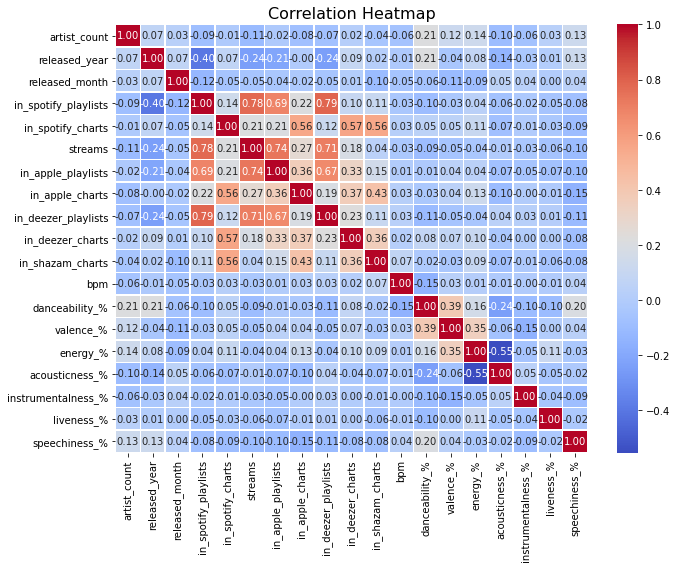

In [13]:
numerical_df = df.select_dtypes(include=['number'])
correlation_matrix = numerical_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

plt.title("Correlation Heatmap", fontsize=16)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

We also wanted to look at the correlation map of our variables in order to determine if there would be any multi-collinearity problems with our model. While most of the variables have little to no correlation with each other, there were a few that worried us. Therefore, we chose to use PCA to try to eliminate any multicollinearity problems by eliminating redundant information and making features linearly independent through the creation of new principal components.

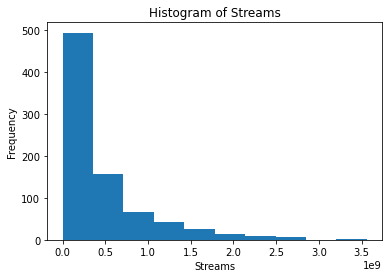

In [14]:
plt.hist(df.streams, bins=10) 
plt.xlabel('Streams')
plt.ylabel('Frequency')
plt.title('Histogram of Streams')
plt.show()

In [15]:
# Converting streams column to log of streams
df['streams'] = np.log(df['streams'])
df.describe()

,artist_count,released_year,released_month,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
count,816.000000,816.000000,816.000000,816.000000,816.000000,816.000000,816.000000,816.000000,751.000000,816.000000,812.000000,816.000000,816.000000,816.000000,816.000000,816.000000,816.000000,816.000000,816.000000
mean,1.568627,2018.517157,6.024510,4852.316176,11.736520,19.427594,60.215686,49.534314,93.544607,2.454657,51.754926,122.580882,67.409314,51.172794,64.356618,26.333333,1.678922,18.170343,10.535539
std,0.876522,10.701973,3.570415,7745.565488,18.624555,1.130405,74.953565,49.570536,155.658936,5.399650,128.813461,28.188643,14.688808,23.620742,16.116646,25.477606,8.772508,13.550239,10.222852
min,1.000000,1930.000000,1.000000,31.000000,0.000000,7.923710,0.000000,0.000000,0.000000,0.000000,0.000000,65.000000,23.000000,4.000000,14.000000,0.000000,0.000000,3.000000,2.000000
25%,1.000000,2021.000000,3.000000,829.000000,0.000000,18.715474,12.000000,6.000000,12.000000,0.000000,0.000000,99.000000,57.000000,32.000000,53.000000,5.000000,0.000000,10.000000,4.000000
50%,1.000000,2022.000000,5.000000,2037.500000,3.000000,19.390841,32.000000,34.500000,32.000000,0.000000,2.000000,120.000000,70.000000,51.000000,66.000000,17.000000,0.000000,12.000000,6.000000
75%,2.000000,2022.000000,9.000000,4890.750000,16.000000,20.214436,78.250000,84.000000,99.000000,2.000000,37.000000,141.250000,79.000000,70.000000,76.000000,41.000000,0.000000,24.000000,12.000000
max,8.000000,2023.000000,12.000000,52898.000000,147.000000,21.993741,532.000000,275.000000,964.000000,45.000000,953.000000,206.000000,96.000000,97.000000,97.000000,97.000000,91.000000,97.000000,64.000000


When doing the original analysis, we found that the histogram our response variable, streams, was skewed heavily to the left, violating the normality assumption. Therefore, we chose to log the response, streams, in order to fit this assumption.

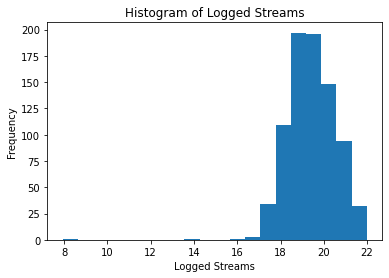

In [16]:
plt.hist(df.streams, bins=20) 
plt.xlabel('Logged Streams')
plt.ylabel('Frequency')
plt.title('Histogram of Logged Streams')
plt.show()

While there is still a small number of outliers, the histogram better fits the normality assumption.

In [17]:
# One-hot encoding dummy variables
df = pd.get_dummies(df, columns=['key', 'mode'], drop_first=True)
df.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,...,key_B,key_C#,key_D,key_D#,key_E,key_F,key_F#,key_G,key_G#,mode_Minor
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,553,147,18.766974,43,263,...,True,False,False,False,False,False,False,False,False,False
1,LALA,Myke Towers,1,2023,3,1474,48,18.711231,48,126,...,False,True,False,False,False,False,False,False,False,False
2,vampire,Olivia Rodrigo,1,2023,6,1397,113,18.757181,94,207,...,False,False,False,False,False,True,False,False,False,False
3,Cruel Summer,Taylor Swift,1,2019,8,7858,100,20.501173,116,207,...,False,False,False,False,False,False,False,False,False,False
4,WHERE SHE GOES,Bad Bunny,1,2023,5,3133,50,19.530023,84,133,...,False,False,False,False,False,False,False,False,False,True


In [18]:
df.isna().sum()

track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
in_spotify_playlists     0
in_spotify_charts        0
streams                  0
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists     65
in_deezer_charts         0
in_shazam_charts         4
bpm                      0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
key_A#                   0
key_B                    0
key_C#                   0
key_D                    0
key_D#                   0
key_E                    0
key_F                    0
key_F#                   0
key_G                    0
key_G#                   0
mode_Minor               0
dtype: int64

In [19]:
# Dropping NA after one-hot encoding because we found an error involved with these NA values later on
df = df.dropna()

In order to continue to our analysis, we chose to one-hot encode the variables key and mode. This converted a cateogircal variable into one that the computer can more easily use for analysis by assigning binary values to these variables. However, we also found another 65 NA values in the column 'in_deezer_charts' and 4 in 'in_shazam_charts'. Again, because hey are such a small proportion of the data, and we did not feel that these columns were that influential, we chose to drop these NA values. 

In [20]:
# Create a danceability squared variable to analyze its diminishing effects on streams
df['danceability_squared'] = df['danceability_%'] ** 2

We also chose to add in a new variable, danceability squared, because we thought that there may be diminishing returns to the benefit of danceability in predicting streams.

In [21]:
# Finding number of principal components
numeric_features = df.select_dtypes(include=['number'])
num_components = numeric_features.shape[1]
print(f"Number of principal components: {num_components}")

Number of principal components: 20


   Principal Component  Explained Variance Ratio  Cumulative Variance
0                  PC1                  0.180250             0.180250
1                  PC2                  0.142348             0.322597
2                  PC3                  0.099572             0.422170
3                  PC4                  0.070298             0.492467
4                  PC5                  0.060305             0.552773
5                  PC6                  0.054045             0.606818
6                  PC7                  0.052432             0.659250
7                  PC8                  0.046496             0.705746
8                  PC9                  0.045982             0.751728
9                 PC10                  0.043253             0.794981
10                PC11                  0.037190             0.832171
11                PC12                  0.034652             0.866823
12                PC13                  0.028729             0.895552
13                PC

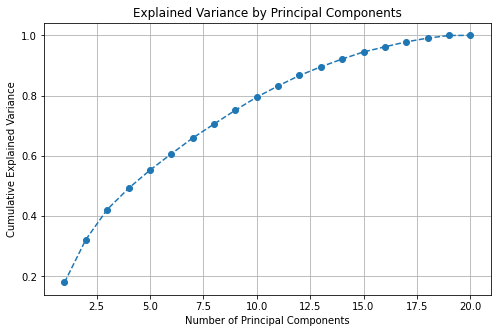

In [22]:
# Disclaimer: Used ChatGPT for part of this

# Performing PCA
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_features)

# Fit PCA
pca = PCA()
pca.fit(scaled_data)

# Explained variance ratio for each component
explained_variance_ratio = pca.explained_variance_ratio_

pca_results = pd.DataFrame({
    'Principal Component': [f'PC{i+1}' for i in range(len(explained_variance_ratio))],
    'Explained Variance Ratio': explained_variance_ratio,
    'Cumulative Variance': explained_variance_ratio.cumsum()
})

print(pca_results)

# Plot cumulative explained variance
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio.cumsum(), marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Principal Components')
plt.grid()
plt.show()

After performing our Principal Component Analysis, we found that there was not a very obvious number of principal components to choose when looking at the tradeoff between explained variance and the number of principal components. However, we settled on 4 because we felt that this was the point where the curve began to flatten, thus representing the diminishing marginal return of an additional component.

In [23]:
# Disclaimer: Used ChatGPT for part of this

# Using LASSO to execute regression analysis
y = df['streams']

X = df.drop(columns=['streams', 'track_name', 'artist(s)_name'])
X_scaled = scaler.fit_transform(X) # Scaling explanatory variables for use in PCA

# PCA
pca = PCA(n_components=4)  # Choosing the number of components
X_pca = pca.fit_transform(X_scaled)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, 
                                                    test_size=0.2, random_state=42)

# LASSO Regression
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)

# Predictions
y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

# Root Mean Squared Error
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

# R-Squared
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Getting observations and paramaters to calculate adjusted R-Squared
n_train, p = X_train.shape
n_test = X_test.shape[0]

# Adjusted R-Squared
train_adj_r2 = 1 - (1 - train_r2) * (n_train - 1) / (n_train - p - 1)
test_adj_r2 = 1 - (1 - test_r2) * (n_test - 1) / (n_test - p - 1)

# Table of regression coefficients
coefficients = pd.DataFrame({
    'Principal Component': [f'PC{i+1}' for i in range(len(lasso.coef_))],
    'Coefficient': lasso.coef_
})

# Results
print(f"Train RMSE: {train_rmse}")
print(f"Test RMSE: {test_rmse}")
print(f"Train R²: {train_r2}")
print(f"Test R²: {test_r2}")
print(f"Train Adjusted R²: {train_adj_r2}")
print(f"Test Adjusted R²: {test_adj_r2}")
print("\nRegression Coefficients Table:")
print(coefficients)

Train RMSE: 0.8631370170880404
Test RMSE: 0.7266196197688751
Train R²: 0.33540014595361445
Test R²: 0.4653538465090661
Train Adjusted R²: 0.33091717897859674
Test Adjusted R²: 0.4506049871024196

Regression Coefficients Table:
  Principal Component  Coefficient
0                 PC1     0.265554
1                 PC2     0.042115
2                 PC3    -0.184816
3                 PC4    -0.000000


After running our final regression, we found that only the first three principal components had a non-zero coefficient. In turn, when evaluating our model we found that our Test RMSE was relatively low, meaning that the model fits the data relatively well and there is a smaller discrepancy between the values the model predicts and the actual values. Depite the range of values for logged streams being around 15, a Test RMSE of about 0.727 means that the model is inaccurate by about 5% on average. However, when looking at a Test R-squared of only 0.465 leads us to believe that our model is not entirely sufficient in predicting the number of streams. Furthermore, the Test adjusted R-squared backs up this hypothesis as the value remains around 0.451, representing that the additional components are not worth the additional predictive ability. We believe that this is because one can not simply predict the number of streams using audio and temporal features. We believe that one of the highest predictive factors will be the artist who releases the song, something that we would include in future models.

# Conclusion

&nbsp;&nbsp;&nbsp;&nbsp;We initially defined a success as “an iterative process wherein each model improves upon another version or is ruled out mainly based on its R-squared and adjusted R-squared values until we find the best model.” In this sense, our analysis was a success. Our model building process was highly iterative, with significant time spent on the back end testing polynomial features, interaction terms, and various other variable transformations.

&nbsp;&nbsp;&nbsp;&nbsp;In our analysis, we first conducted PCA as planned in order to reduce dimensionality, decorrelate variables, and identify patterns in the data. To start with, we chose 10 components to use in our regression, as there appeared to be an inflection point here in our explained variance graph. We then continued with our plan and ran a LASSO regression to regularize our coefficients and improve variable selection. In this way, we hoped to avoid overfitting and multicollinearity while also maintaining an effective model in terms of predictive power.

&nbsp;&nbsp;&nbsp;&nbsp;After first running our regression, results were varied. While we did have great R-squared and adjusted R-squared values in excess of .80, our RMSE was enormous. Our high R-squared values and massive RMSE immediately set off alarm bells. Looking back at our data, we observed that the outliers and large distribution of stream counts, with some songs having billions while others had just a couple thousand, might be affecting our RMSE. Subsequently, we decided to take the log of our streams response variable to smooth out any errors caused by its distribution. In running our regression again, we found that using the log of streams as our response variable significantly increased the accuracy of our predictions.

&nbsp;&nbsp;&nbsp;&nbsp;Next, we observed that in the output of the LASSO regression, all but 3 of our variables had non-zero coefficients. Thus, we re-ran the regression using 4 components for PCA. Our RMSE decreased further, although our R-squared was no longer very high. We decided to prioritize a low RMSE over a high R-squared in our model.

&nbsp;&nbsp;&nbsp;&nbsp;Finally, we tested a number of different interaction terms and polynomials in order to test non-linear relationships and any dependencies between variables. This process simply consisted of running the regression over and over again while replacing our transformed variables. The only variable that we observed to have a significant impact on improving our model was danceability squared. Possibly, songs that are very easy to dance to are catchy and used in parties or on radios often, which could increase distribution and therefore streams.

&nbsp;&nbsp;&nbsp;&nbsp;Our final model consisted of four PCA components, two with positive coefficients and two with negative coefficients. Our final train RMSE is 0.86, while our final test RMSE is 0.73. This test RMSE indicates that the model is inaccurate by about 5% on average. Our train R-squared and test R-squared were 0.36 and 0.47 respectively. While this result does signal that our model does not suffer from overfitting, it was slightly disappointing as it means that our model doesn’t explain a large proportion of the variance in the streams variable.

&nbsp;&nbsp;&nbsp;&nbsp;Our final conclusion from this result is that simply using quantitative factors like inclusion in playlists and danceability is not effective in predicting the number of streams a song receives. There are far too many factors, both obvious and hidden, that go into producing and marketing a song than can be captured using the data available to us. We hypothesize that an artist’s popularity may be one of the predominant factors in predicting song popularity. For instance, a song released by Taylor Swift will automatically receive millions more streams than a song released by a new artist, regardless of how the song sounds. Additionally, we believe that the danceability, acousticness, etc., are not enough to capture how a certain song sounds. Although it may be difficult, an interesting study in the future could be to utilize the waveforms of different layers in songs in addition to our previous auditory variables to predict streams while controlling for artist popularity.

# References/Bibliography

Elgiriyewithana, Nidula. Most Streamed Spotify Songs 2023. 2023. Kaggle, https://www.kaggle.com/datasets/nelgiriyewithana/top-spotify-songs-2023.

Open AOI. ChatGPT. 2024. Open AI,
	https://openai.com/chatgpt. 